# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = datetime.datetime.today()

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cityList = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cityList:
        cityList.append(city)

# Print the city count to confirm sufficient count
print(len(cityList))

655


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
units = "metric"
settings ={"APPID":api_key, "units":units}

cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
maxTemp = []
windSpeed = []

for i in range(len(cityList)):
    try:
        city = owm.get_current(cityList[i], **settings)
        print(f"Processing city {i+1} of {len(cityList)}: {cityList[i]}")
        cities.append(city("name"))
        cloudiness.append(city("clouds.all"))
        country.append(city("sys.country"))
        date.append(city("dt"))
        humidity.append(city("main.humidity"))
        lat.append(city("coord.lat"))
        long.append(city("coord.lon"))
        maxTemp.append(city("main.temp_max"))
        windSpeed.append(city("wind.speed"))
    except:
        print(f"City [{cityList[i]}] not found")
print("******** FINISHED PROCESSING CITIES ********")

Processing city 1 of 655: norman wells
Processing city 2 of 655: qaanaaq
Processing city 3 of 655: kavieng
Processing city 4 of 655: boueni
City [belushya guba] not found
Processing city 6 of 655: cape town
Processing city 7 of 655: meulaboh
Processing city 8 of 655: torbay
Processing city 9 of 655: hithadhoo
Processing city 10 of 655: kloulklubed
Processing city 11 of 655: khatanga
Processing city 12 of 655: avarua
Processing city 13 of 655: victor harbor
Processing city 14 of 655: umm lajj
Processing city 15 of 655: tasiilaq
Processing city 16 of 655: mirnyy
City [mys shmidta] not found
Processing city 18 of 655: punta arenas
Processing city 19 of 655: mataura
City [saleaula] not found
Processing city 21 of 655: lakhtar
Processing city 22 of 655: ancud
Processing city 23 of 655: rawson
Processing city 24 of 655: port elizabeth
Processing city 25 of 655: bluff
Processing city 26 of 655: hermanus
Processing city 27 of 655: yerbogachen
Processing city 28 of 655: albany
Processing city 2

Processing city 232 of 655: manokwari
Processing city 233 of 655: farmington
Processing city 234 of 655: klaksvik
Processing city 235 of 655: saint-paul-les-dax
Processing city 236 of 655: vysotsk
Processing city 237 of 655: kochki
Processing city 238 of 655: half moon bay
Processing city 239 of 655: husavik
Processing city 240 of 655: darnah
Processing city 241 of 655: gat
Processing city 242 of 655: kodiak
Processing city 243 of 655: dongsheng
Processing city 244 of 655: los llanos de aridane
Processing city 245 of 655: pochutla
Processing city 246 of 655: psedakh
Processing city 247 of 655: shediac
Processing city 248 of 655: pedernales
Processing city 249 of 655: campbell river
Processing city 250 of 655: iqaluit
Processing city 251 of 655: honiara
Processing city 252 of 655: bethel
Processing city 253 of 655: trelew
Processing city 254 of 655: barcelos
Processing city 255 of 655: garowe
Processing city 256 of 655: moroto
Processing city 257 of 655: luang prabang
Processing city 25

Processing city 456 of 655: mabaruma
Processing city 457 of 655: skibbereen
Processing city 458 of 655: valparaiso
Processing city 459 of 655: srednekolymsk
Processing city 460 of 655: tyubuk
Processing city 461 of 655: maceio
Processing city 462 of 655: timra
Processing city 463 of 655: eyemouth
Processing city 464 of 655: stryn
Processing city 465 of 655: saint-joseph
Processing city 466 of 655: pevek
Processing city 467 of 655: dolores
Processing city 468 of 655: bereda
Processing city 469 of 655: huai yot
Processing city 470 of 655: karratha
Processing city 471 of 655: jhang
Processing city 472 of 655: brigantine
Processing city 473 of 655: damara
Processing city 474 of 655: silopi
Processing city 475 of 655: norrtalje
Processing city 476 of 655: rognan
Processing city 477 of 655: port hedland
Processing city 478 of 655: skjervoy
Processing city 479 of 655: ampanihy
City [ardistan] not found
Processing city 481 of 655: necochea
Processing city 482 of 655: gondanglegi
Processing cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
citiesDf = {
    "City" : cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitud" : lat,
    "Longitud" : long,
    "Max Temp" : maxTemp,
    "Wind Speed" : windSpeed
}
citiesDf = pd.DataFrame(citiesDf)
citiesDf = citiesDf.sort_values(by="City")
citiesDf.to_csv(path_or_buf="citiesDataFrame.csv", index=False)

citiesDf.head()

,City,Cloudiness,Country,Date,Humidity,Latitud,Longitud,Max Temp,Wind Speed
345,Abalak,37,NE,1563034373,25,15.46,6.28,36.08,3.61
352,Abbeville,40,FR,1563034375,68,50.11,1.83,23.33,4.10
544,Abnub,0,EG,1563034427,26,27.27,31.15,40.00,4.60
308,Abu Dhabi,0,AE,1563034103,56,24.47,54.37,36.00,5.70
201,Abu Samrah,0,SY,1563034337,37,35.30,37.18,29.48,9.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

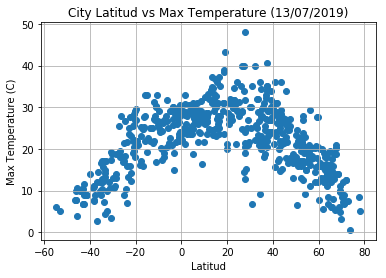

In [25]:
fig, ax = plt.subplots()

latTempPlot = ax.scatter(citiesDf.Latitud, citiesDf["Max Temp"])

ax.set_title(f"City Latitud vs Max Temperature ({today.strftime('%d/%m/%Y')})")
ax.set_xlabel("Latitud")
ax.set_ylabel("Max Temperature (C)")
plt.grid()
plt.show()

fig.savefig("latitudeVsTemp.png")

#### Latitude vs. Humidity Plot

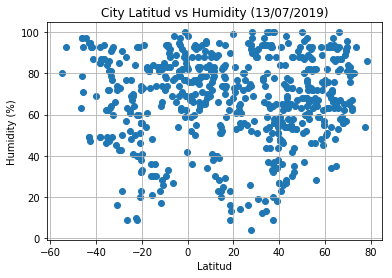

In [26]:
plt.close()
fig, ax = plt.subplots()

latTempPlot = ax.scatter(citiesDf.Latitud, citiesDf.Humidity)

ax.set_title(f"City Latitud vs Humidity ({today.strftime('%d/%m/%Y')})")
ax.set_xlabel("Latitud")
ax.set_ylabel("Humidity (%)")
plt.grid()
plt.show()

fig.savefig("latitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

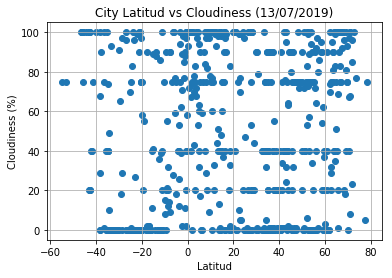

In [27]:
plt.close()
fig, ax = plt.subplots()

latTempPlot = ax.scatter(citiesDf.Latitud, citiesDf.Cloudiness)

ax.set_title(f"City Latitud vs Cloudiness ({today.strftime('%d/%m/%Y')})")
ax.set_xlabel("Latitud")
ax.set_ylabel("Cloudiness (%)")
plt.grid()
plt.show()

fig.savefig("latitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

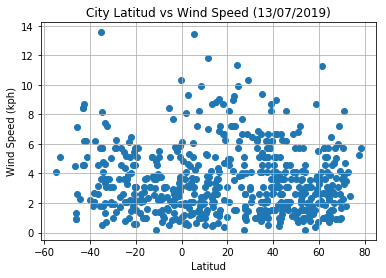

In [28]:
plt.close()
fig, ax = plt.subplots()

latTempPlot = ax.scatter(citiesDf.Latitud, citiesDf["Wind Speed"])

ax.set_title(f"City Latitud vs Wind Speed ({today.strftime('%d/%m/%Y')})")
ax.set_xlabel("Latitud")
ax.set_ylabel("Wind Speed (kph)")
plt.grid()
plt.show()

fig.savefig("latitudeVsWindSpeed.png")

In [ ]:
# Observble trends

#1) Latitud and Temperature are highly correlated (of course!)

#2) The lowest humidity is found in cities concentrated around the tropics (23 degrees north and south), which makes sense,
#    as most deserts are also found around the tropics

#3) There doesn't seem to be any significant correlation between latitud and either Cloudiness or Wind Speed.